In [5]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import SQcircuit as sq
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
import importlib
import scipy as sp

%matplotlib ipympl
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Palatino"],
# })
plt.rcParams['text.usetex'] = False
importlib.reload(sq_ext)
importlib.reload(sq)
importlib.reload(figs)
np.set_printoptions(linewidth=300, formatter={'float': '{:.12f}'.format})
# np.set_printoptions(linewidth=200, formatter={'float': '{:.1e}'.format})

In [6]:
nH   = 1e-9
fF   = 1e-15
GHz  = 1e9
h    = 6.626e-34
e0   = 1.602e-19
Φ_0  = h/(2*e0)

In [20]:
C, CJ, Csh, Lq, Lr, Δ, EJ = sq_ext.get_experimental_parameters('qubit_1', return_effective=False)
CF, CR = sq_ext.C_CJ_Csh_to_CF_CR_eff(C, CJ, Csh)
LF, LR, LC = sq_ext.Lq_Lr_to_LF_LR_LC_eff(Lq, Lr, Δ)
EL = sq_ext.L_to_EL(LF)
φ_ext=0.5

In [8]:
n_plot = 100
param_name = '\\Delta'
param_values = np.geomspace(1e-5, 8, n_plot)
Δ_values = param_values

In [12]:
def g_unit_cell(CR, CF, LF, LR, EJ, LC, φ_ext):
    fluxonium = sq_ext.sq_fluxonium(C_F_eff=CF, L_F_eff=LF, EJ=EJ, φ_ext=φ_ext)
    fluxonium.diag(2)
    CR *= fF
    CF *= fF
    LR *= nH
    LF *= nH
    LC *= nH
    Φ_f  = np.real( fluxonium.flux_op(0,'eig')[1,0])  
    Φ_r  = np.sqrt(0.5*np.sqrt(LR/CR))   
    return Φ_f * Φ_r / LC /2/np.pi/GHz

In [28]:
EJ_values = np.geomspace(1e-1,100,100)
φ_ext_values = np.linspace(0,0.5,100)

In [40]:
g_vs_EJ = np.array([g_unit_cell(CR, CF, LF, LR, EJ_i, LC, φ_ext) for EJ_i in EJ_values])
g_vs_φ_ext = np.array([g_unit_cell(CR, CF, LF, LR, EJ, LC, φ_ext_i) for φ_ext_i in φ_ext_values])

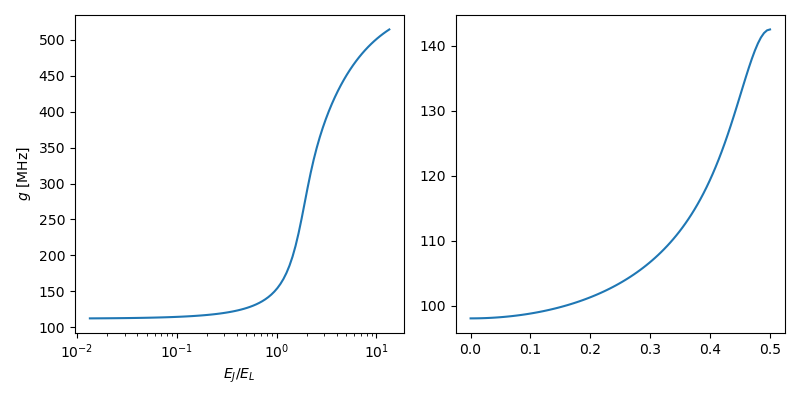

In [41]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = [8,4])

ax1.plot(EJ_values/EL, g_vs_EJ * 1e3)
ax2.plot(φ_ext_values, g_vs_φ_ext * 1e3)

ax1.set_xlabel('$E_J/E_{L}$')
ax1.set_ylabel('$g$ [MHz]')
ax1.set_xscale('log')
fig.tight_layout()
fig.show()

In [42]:
EJ_values = np.geomspace(1e-1,100,100)
φ_ext_values = np.linspace(0,0.5,50)
g_vs_EJ_φ_ext = np.zeros([len(EJ_values), len(φ_ext_values)])
for i, EJ_i in enumerate(EJ_values):
    for j, φ_ext_j in enumerate(φ_ext_values):
        g_vs_EJ_φ_ext[i,j] = g_unit_cell(CR, CF, LF, LR, EJ_i, LC, φ_ext_j) 

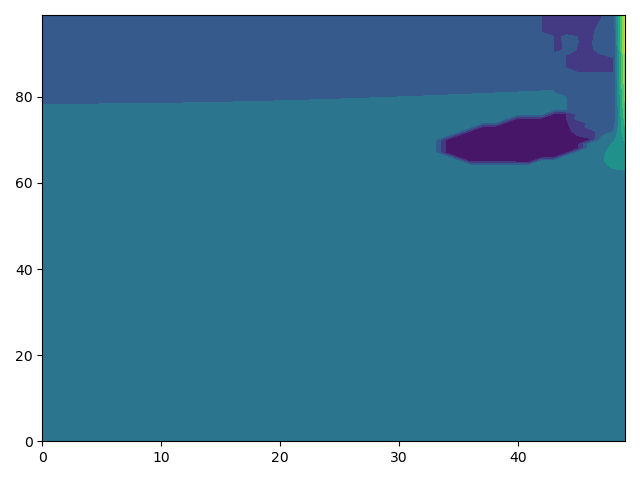

In [50]:
fig, ax = plt.subplots()

ax.contourf(g_vs_EJ_φ_ext )

# ax.set_xscale('log')
fig.tight_layout()
fig.show()
